In [1]:
import pyvista as pv
from Kirchhoffpy import lenspy
from Kirchhoffpy import Feedpy
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from Kirchhoffpy import coordinate,field_storage
from Kirchhoffpy.Vopy import CO,dotproduct
import torch as T
c=299792458
p = pv.Plotter()
srffolder = 'srf/'


10


In [2]:
# 1. define frequnecy and wavelength
freq = 150*10**9
Lambda = c*1000/freq
k = 2*np.pi/Lambda
print(Lambda,k)


1.9986163866666666 3.1437675329275225


In [3]:
# 2. define coordinate systems
coord_ref = coordinate.coord_sys([0,0,0],[0,0,0],axes = 'xyz')

coord_L1 = coordinate.coord_sys([0,0,-(803.9719951339465-4.34990822154231*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L2 = coordinate.coord_sys([0,0,-(227.64396727901004-4.696706712699847*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)
coord_L3 = coordinate.coord_sys([0,0,-(71.77590111674095-2.96556*10)],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_feed = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)

coord_sky = coordinate.coord_sys([0,0,0],[np.pi,0,0],axes = 'xyz',ref_coord = coord_ref)


In [4]:
# 3. define input Feedhorn
feed= Feedpy.GaussiBeam(-2.1714724,
                        10.1161095,
                        k,
                        coord_feed,
                        polarization = 'x')


26584903304305.848


In [5]:
# 4. Lenses and aperture 
L1 = lenspy.simple_Lens(3.36,
                        4.34990822154231*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens1_f2.rsf', 
                        srffolder + 'lens1_f1.rsf',
                        p,
                        coord_L1,
                        name = 'L1',
                        outputfolder = 'output2/150GHz/')
L2 = lenspy.simple_Lens(3.36,
                        4.69671*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens2_f2.rsf', 
                        srffolder + 'lens2_f1.rsf',
                        p,
                        coord_L2,
                        name = 'L2',
                        outputfolder = 'output2/150GHz/')

L3 = lenspy.simple_Lens(3.36,
                        2.96556*10,# Thickness
                        44.8*10, # diameter
                        srffolder + 'lens3_f2.rsf', 
                        srffolder + 'lens3_f1.rsf',
                        p,
                        coord_L3,
                        name = 'L3',
                        outputfolder = 'output2/150GHz/')
#L2 = lenspy.simple_Lens(2,46.9671 ,400, srffolder + 'lens2_f1.rsf', srffolder + 'lens2_f2.rsf',p,[0,0,-227.64396727901004],name = 'L2')
#L3 = lenspy.simple_Lens(2,29.6556 ,400, srffolder + 'lens3_f1.rsf', srffolder + 'lens3_f2.rsf',p,[0,0,-71.77590111674095],name = 'L3')


In [6]:
# 5. fiedl storage
center_grd = field_storage.Spherical_grd(coord_sky,
                                         0,
                                         0,
                                         20,
                                         20,
                                         501,501,
                                         Type = 'ELoverAz', 
                                         far_near = 'far',
                                         distance = 50000)


In [7]:
N1 =[760,1520]
N2 = [570,820]
L3.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            feed,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO',
            device = T.device('cuda'))


Gain of the Guassian feedhonr!
-6.631810613625867 dB
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
#$%^&&*&*())_
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.0036699209269507997 1.389061164551834e-15
check boundary conditions!!
E field:
output poynting:
0.002594675177599914
tiemusage: 0.09441208839416504
Batch size: 23
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 13029/13029 [06:37<00:00, 32.82it/s]


398.4911413192749
#$%^&&*&*())_
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.0019037191223372047 8.489905929262248e-17
check boundary conditions!!
E field:
output poynting:
0.0013459510741008775


In [8]:
N1 =[720,2240]
N2 = [250,255]
L2.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L3,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2/150GHz/L3_po_cur_0mm.h5
Here
tiemusage: 0.03623056411743164
Batch size: 57
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 18061/18061 [08:46<00:00, 34.31it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
#$%^&&*&*())_
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
0.00011630426325072905 1.8844754474460968e-11
check boundary conditions!!
E field:
output poynting:
8.225928734638631e-05
tiemusage: 0.13011550903320312
Batch size: 16
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 2594/2594 [01:15<00:00, 34.25it/s]


77.10724091529846
#$%^&&*&*())_
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
6.62228947701481e-05 1.1877744067983624e-11
check boundary conditions!!
E field:
output poynting:
4.6820953224101725e-05


In [9]:
N1 =[660,2240]
N2 = [610,185]
L1.PO_analysis(#[400,1,400,1],
               [1,N1[0],N1[1],1],
               [1,N2[0],N2[1],1],
               #[5,N2[0],N2[1],1],
            L2,k,
            sampling_type_f1='polar',
            phi_type_f1 = 'less',
            sampling_type_f2='polar',
            phi_type_f2 = 'less',
            po_name = '_po_cur_0mm.h5',
            Method ='POPO')


output2/150GHz/L2_po_cur_0mm.h5
Here
tiemusage: 0.00441288948059082
Batch size: 418
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 2257/2257 [01:03<00:00, 35.67it/s]


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
#$%^&&*&*())_
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
5.250492717807698e-06 3.402416362653206e-07
check boundary conditions!!
E field:
output poynting:
3.7128086013346204e-06
tiemusage: 0.12621545791625977
Batch size: 18
cuda:0 cuda:0 cuda:0
True True True


100%|██████████| 4115/4115 [02:04<00:00, 33.06it/s]


125.87825441360474
#$%^&&*&*())_
check the sin(theta_i)
##############
check energy conservation!
check the poynting vector
3.496521868390292e-06 2.145300323660724e-07
check boundary conditions!!
E field:
output poynting:
3.0272363014044213e-06


In [10]:
center_grd.grid.x = center_grd.grid.x.ravel()
center_grd.grid.y = center_grd.grid.y.ravel()
center_grd.grid.z = center_grd.grid.z.ravel()
print(center_grd.grid.z.size)


251001


In [11]:
#L1.surf_cur_file = 'output/L1_po_cur_0mm_x.h5'

L1.source(center_grd,
          k,
          far_near = 'far')


output2/150GHz/L1_po_cur_0mm.h5
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
*(**)
Batch size: 783


100%|██████████| 320/320 [00:11<00:00, 27.03it/s]


In [12]:
r, theta, phi = center_grd.coord_sys._toSpherical(center_grd.grid.x,center_grd.grid.y,center_grd.grid.z)
co,cx,crho = CO(theta,phi)
E_co = dotproduct(center_grd.E,co)
E_cx = dotproduct(center_grd.E,cx)


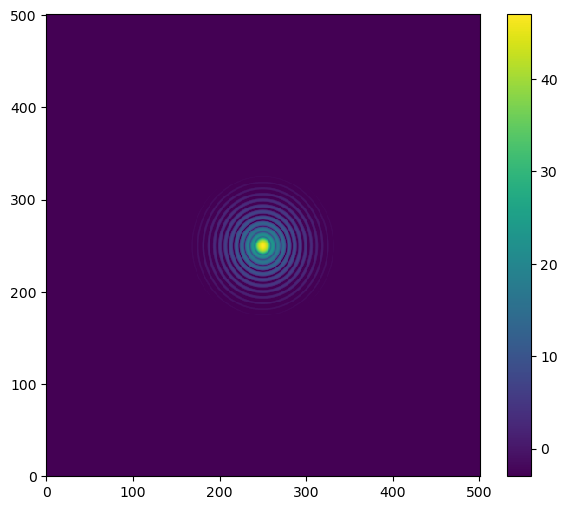

In [13]:
fig = plt.figure(figsize = (7,6))
vmax= np.log10(np.abs(E_co.reshape(501,-1)).max())*20
plt.pcolor(np.log10(np.abs(E_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


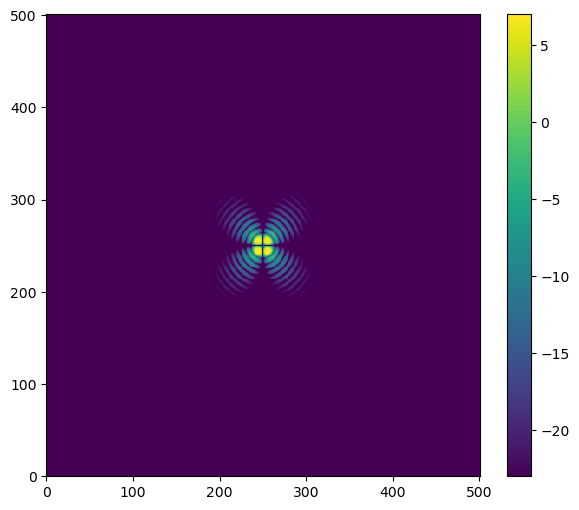

In [14]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(E_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


In [15]:
import h5py as h5
def readh5(fname):
    name = fname.split('.')
    with h5.File(name[0]+'.h5','r') as f:
        co = f['co-polar'][:,:]
        cx = f['cx-polar'][:,:]
        Az = f['Az'][:]
        El = f['El'][:]
    return Az, El, co, cx


In [16]:
Az, El, grasp_co,grasp_cx = readh5('output2/150GHz/150GHz_test/_H5/_x0_y0GHz.h5')


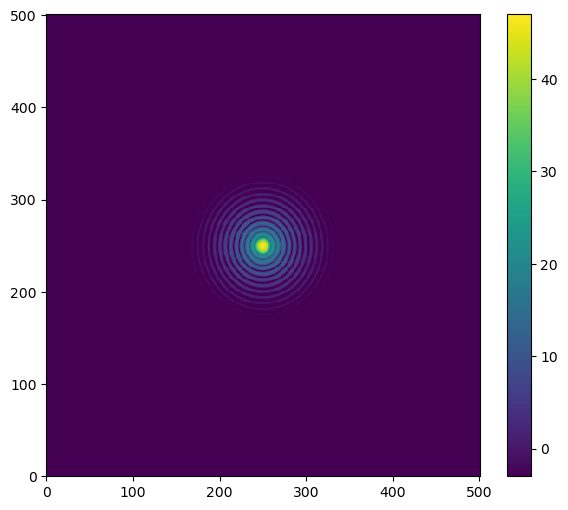

In [17]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_co.reshape(501,-1)))*20,vmax = vmax, vmin = vmax-50)
plt.colorbar()


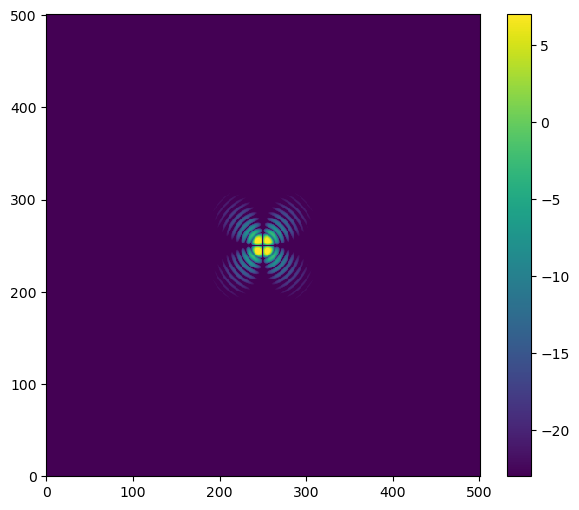

In [18]:
fig = plt.figure(figsize = (7,6))
plt.pcolor(np.log10(np.abs(grasp_cx.reshape(501,-1)))*20,vmax = vmax-40, vmin = vmax-70)
plt.colorbar()


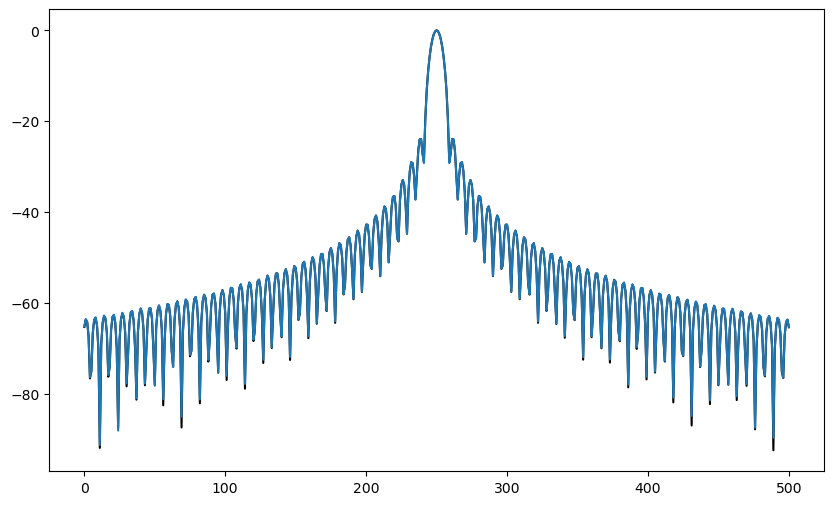

In [19]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:])/np.abs(grasp_co.reshape(501,-1)[250,:]).max())*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])/np.abs(E_co.reshape(501,-1)[250,:]).max())*20,'-')


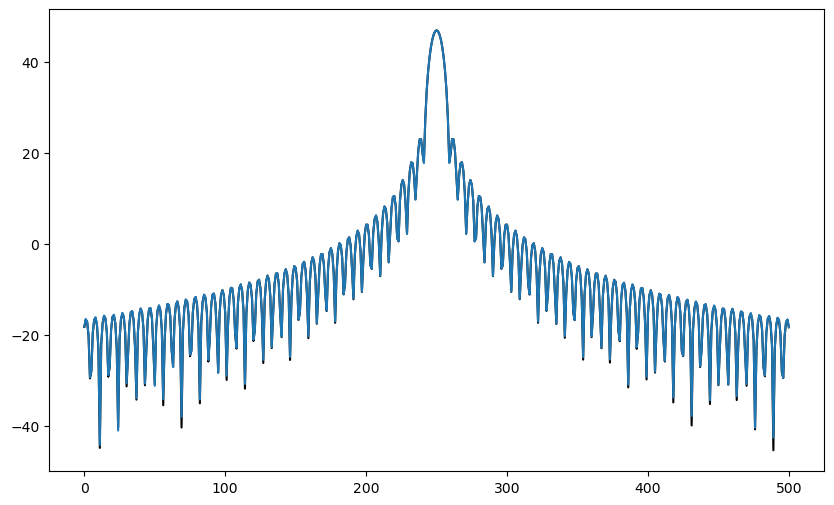

In [20]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


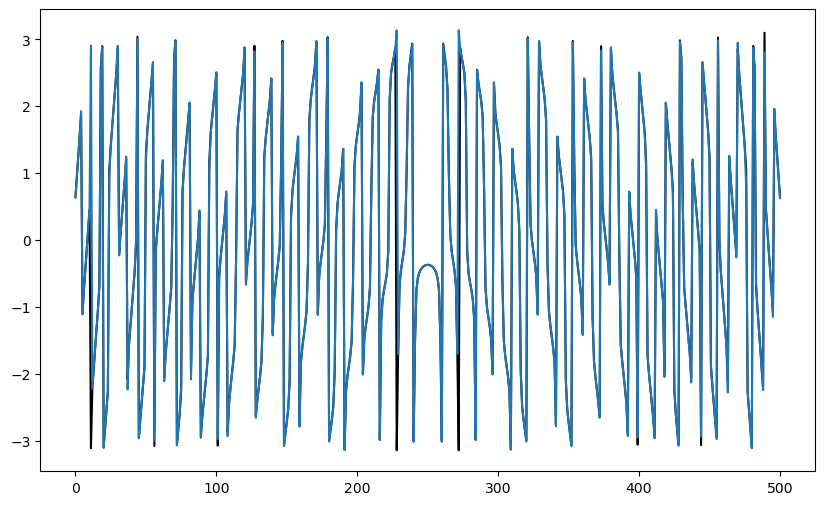

In [21]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.angle(grasp_co.reshape(501,-1)[250,:]/np.abs(grasp_co.reshape(501,-1)[250,:]).max()),'k-')
plt.plot(np.angle(E_co.reshape(501,-1)[250,:]/np.abs(E_co.reshape(501,-1)[250,:]).max()),'-')


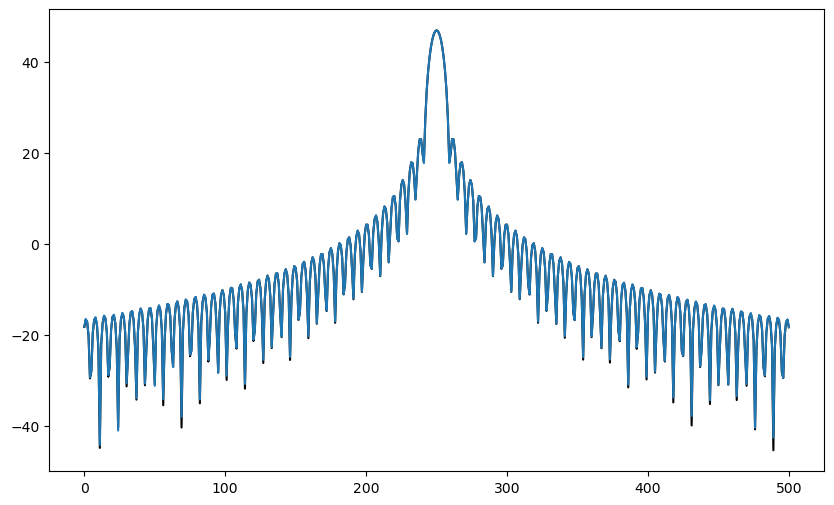

In [22]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


In [23]:
G_co = grasp_co.reshape(501,-1).T/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1).T/E_co.reshape(501,-1)[250,250]
err = H_co-G_co


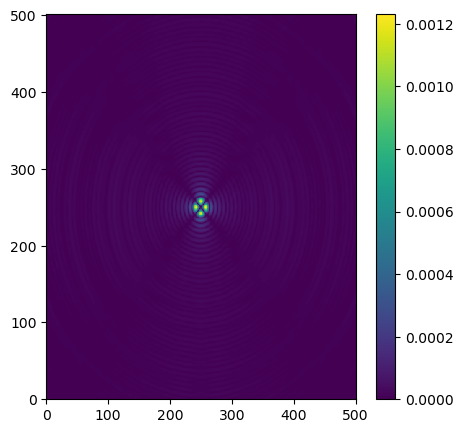

In [24]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


In [25]:
G_co = grasp_co.reshape(501,-1)/grasp_co.reshape(501,-1)[250,250]
H_co = E_co.reshape(501,-1)/E_co.reshape(501,-1)[250,250]
err = G_co-G_co.T
err2 = H_co-H_co.T


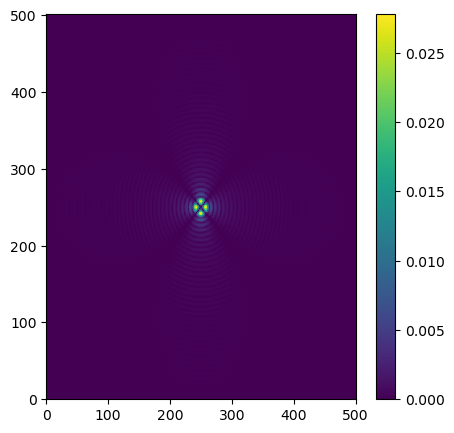

In [26]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


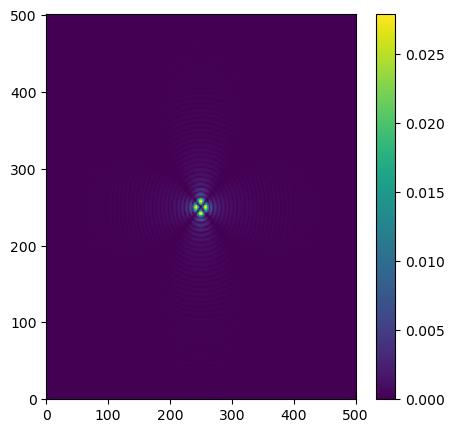

In [27]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err2))
plt.colorbar()


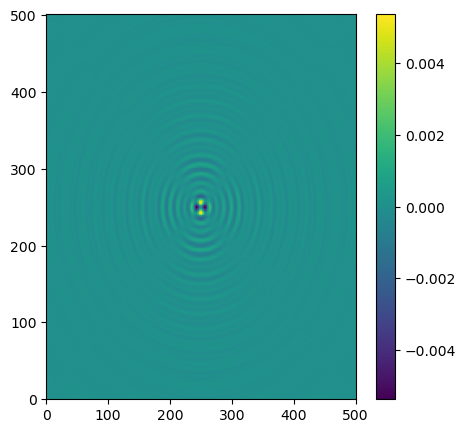

In [28]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(err.imag)
plt.colorbar()


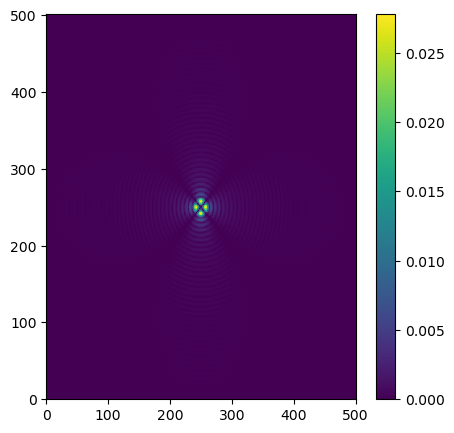

In [29]:
fig = plt.figure(figsize=(5,5))
plt.pcolor(np.abs(err))
plt.colorbar()


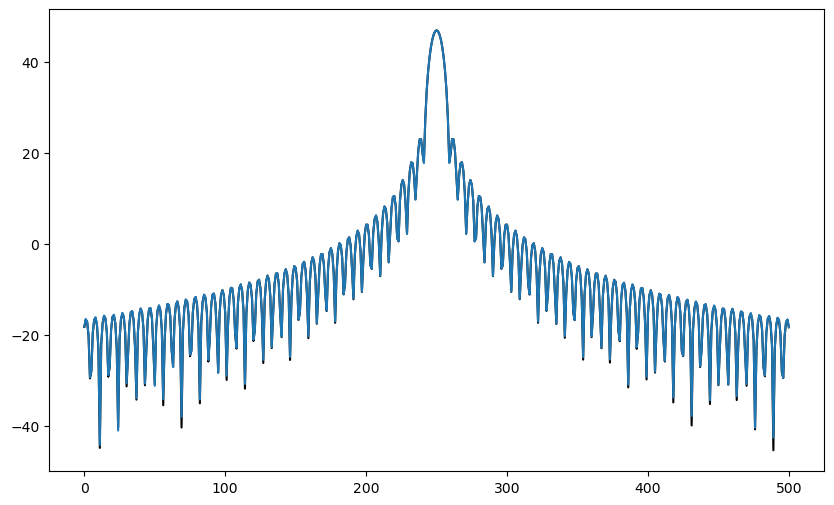

In [30]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(np.log10(np.abs(grasp_co.reshape(501,-1)[250,:]))*20,'k-')
plt.plot(np.log10(np.abs(E_co.reshape(501,-1)[250,:])**2)*10,'-')


(-70.0, 15.0)

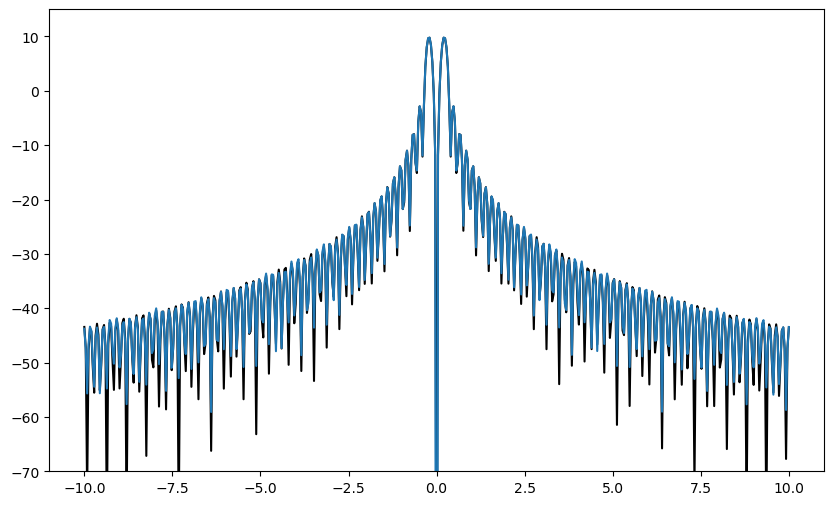

In [37]:
fig  =  plt.figure(figsize= (10,6))
plt.plot(Az,np.log10(np.abs(np.diagonal(grasp_cx.reshape(501,-1))))*20,'k-')
plt.plot(Az,np.log10(np.abs(np.diagonal(center_grd.E.y.reshape(501,-1))))*20,'-')
plt.ylim([-70,15])
#plt.xlim([-1,1])


In [32]:
L_lensFp_3   = 7.177590111674096
L_lens3_2    = 15.586806616226909
L_lens2_1    = 57.632802785493645
L_lens1_Lyot = 1.162050628144469
L_Ly_vw      = 22.7114

L_lens1_ref = L_lensFp_3 + L_lens3_2 + L_lens2_1
L_lens2_ref = L_lensFp_3 + L_lens3_2
L_lens3_ref = L_lensFp_3 
L_Ly_ref = L_lens1_ref + L_lens1_Lyot
L_vw_ref = L_Ly_ref + L_Ly_vw


In [33]:
print(L_lens1_ref*10)
print(L_lens2_ref*10)
print(L_lens3_ref*10)


803.9719951339465
227.64396727901004
71.77590111674095


In [34]:
Az.size


501

In [35]:
x = np.linspace(0,1,201)
y = np.sqrt(x)
y2= x**(1/3)


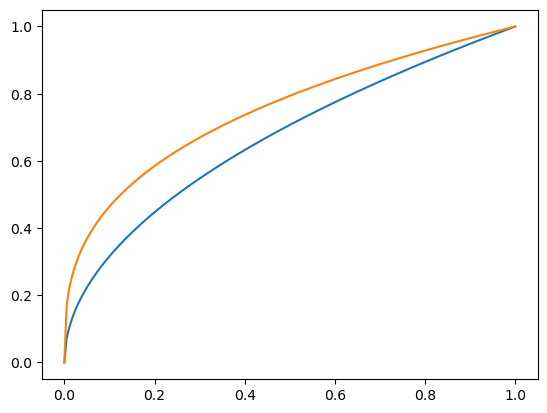

In [36]:
plt.plot(x,y)
plt.plot(x,y2)
